## Импортируем нужные библиотеки

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

## Загружаем датасет

In [2]:
!gdown 1o42zw-uR_uCLPWhcFGbrUz56UkC6HgvQ
df = pd.read_csv('360T.csv')
df

Downloading...
From: https://drive.google.com/uc?id=1o42zw-uR_uCLPWhcFGbrUz56UkC6HgvQ
To: /content/360T.csv
100% 490k/490k [00:00<00:00, 6.66MB/s]


,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min,class
0,38007,2533,31348,2089,218,1777,46,266,2266,38,...,583,1328,108,69,136,46,1.02,2,1,0
1,32695,2179,26253,1750,212,1726,48,212,1814,34,...,575,1344,105,32,83,48,1.00,1,1,0
2,32655,2177,26396,1759,212,1654,41,212,1701,30,...,578,1270,120,21,76,41,1.00,1,1,0
3,33541,2236,26612,1774,213,1695,50,214,1741,38,...,586,1316,112,1,82,50,1.00,1,1,0
4,32925,2195,26472,1764,213,1750,44,213,1805,35,...,586,1375,115,1,83,44,1.00,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,33025,2201,26446,1763,212,1654,45,213,1674,37,...,579,1273,126,1,81,45,1.00,1,1,1
2332,33072,2204,26372,1758,211,1685,39,212,1721,39,...,573,1307,106,1,86,39,1.00,1,1,1
2333,32555,2170,26043,1736,210,1667,48,210,1716,37,...,567,1289,117,1,77,48,1.00,1,1,1
2334,33033,2202,26395,1759,212,1714,47,213,1722,38,...,581,1335,92,1,79,46,1.00,1,1,1


Посмотрим на распределение откликов

(array([  85., 2251.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

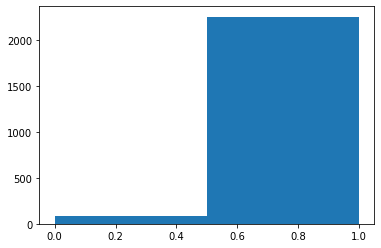

In [ ]:
plt.hist(df['class'],bins = 2)

Разделим датасет на обучающую и тестовую выборки. Из-за неоднородности объектов используем стратификацию по столбцу откликов.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1],
                                                    test_size=0.3, random_state=65, stratify = df.iloc[:,-1])

Произведем стандартизацию признаков

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Обучаем скейлер на X_train и применяем преобразование
X_train_scaled = sc.fit_transform(X_train)

# Преобразовываем X_test
X_test_scaled = sc.transform(X_test)

## Строим классификатор

In [5]:
mlp = MLPClassifier(random_state=65,
                    hidden_layer_sizes=(31, 10), # Используем три скрытых слоя и укажем число нейронов в каждом
                    activation='logistic', # Определим функцию активации
                    max_iter=1000, # Максимальное число эпох обучения
                   )
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(31, 10), max_iter=1000,
              random_state=65)

Посмотрим, как убывал loss в зависимости от номера эпохи обучения

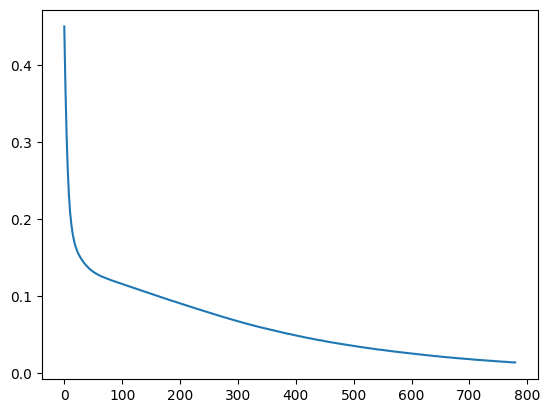

In [6]:
plt.plot(mlp.loss_curve_)

Произведем оценку нашей модели

In [7]:
y_mlp_pred = mlp.predict(X_test_scaled)
y_mlp_pred
print(classification_report(y_test, y_mlp_pred, digits=3))

              precision    recall  f1-score   support

           0      0.636     0.538     0.583        26
           1      0.982     0.988     0.985       675

    accuracy                          0.971       701
   macro avg      0.809     0.763     0.784       701
weighted avg      0.969     0.971     0.970       701



In [8]:
(0.636 + 0.982) / 2

0.8089999999999999

## Предсказание

Выполним предсказание для первого объекта тестовой выборки

In [17]:
X_test_new = pd.read_csv("DL_Task_2_test_file_166.csv")
X_test_new.head()

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min
0,31476,2098,25151,1676,206,1600,23,204,1616,32,...,8466,564,1223,131,1,77,23,0.18,1,0


In [18]:
# Выбираем произвольный объект из начального набора данных
test_obj = X_test_new

# Не забываем масштабировать признаки тестового объекта
test_obj = sc.transform(test_obj)
print("Assigned class: ",mlp.predict(test_obj))

Assigned class:  [1]
